In [ ]:
import pandas as pd
import requests
from PIL import Image
import io
import matplotlib.pyplot as plt

In [ ]:
#share  the api key:
nasa_key='lmMeeRdybMpSh9TKcuhluWEpWzbBEdBVOxiIJqZ9'
#api url endpoint:
api_url=f"https://api.nasa.gov/planetary/apod?api_key={nasa_key}"
#Make a get requesr to patch Html endpoint:
response=requests.get(api_url)
response.json()

{'copyright': '\nAntoine & Dalia Grelin\n',
 'date': '2023-09-26',
 'explanation': "Do you see the horse's head?   What you are seeing is not the famous Horsehead nebula toward Orion, but rather a fainter nebula that only takes on a familiar form with deeper imaging.  The main part of the here-imaged molecular cloud complex is  reflection nebula IC 4592.  Reflection nebulas are made up of very fine dust that normally appears dark but can look quite blue when reflecting the visible light of energetic nearby stars.  In this case, the source of much of the reflected light is a star at the eye of the horse.  That star is part of Nu Scorpii, one of the brighter star systems toward the constellation of the Scorpion (Scorpius).   A second reflection nebula dubbed IC 4601 is visible surrounding two stars above and to the right of the image center.",
 'hdurl': 'https://apod.nasa.gov/apod/image/2309/BlueHorse_Grelin_9342.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'IC 4592:

In [ ]:
if response.status_code==200:
   data=response.json()
data


{'copyright': '\nAntoine & Dalia Grelin\n',
 'date': '2023-09-26',
 'explanation': "Do you see the horse's head?   What you are seeing is not the famous Horsehead nebula toward Orion, but rather a fainter nebula that only takes on a familiar form with deeper imaging.  The main part of the here-imaged molecular cloud complex is  reflection nebula IC 4592.  Reflection nebulas are made up of very fine dust that normally appears dark but can look quite blue when reflecting the visible light of energetic nearby stars.  In this case, the source of much of the reflected light is a star at the eye of the horse.  That star is part of Nu Scorpii, one of the brighter star systems toward the constellation of the Scorpion (Scorpius).   A second reflection nebula dubbed IC 4601 is visible surrounding two stars above and to the right of the image center.",
 'hdurl': 'https://apod.nasa.gov/apod/image/2309/BlueHorse_Grelin_9342.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'IC 4592:

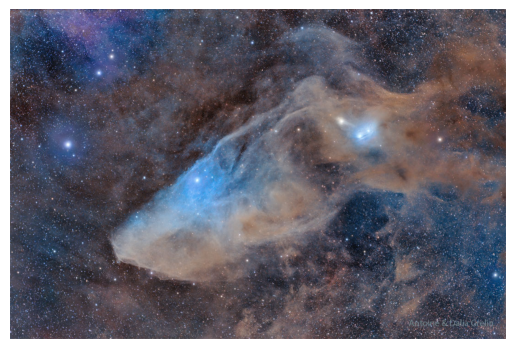

In [ ]:
#Display image:
url_image=data['url']
response=requests.get(url_image)
in_memory_file=io.BytesIO(response.content)
im=Image.open(in_memory_file)
plt.axis("off")
plt.imshow(im)

In [ ]:
#get more information :
title =data['title']
date=data['date']
explanation=data['explanation']
url=data['url']

In [ ]:
# NEO's(near earth) url:
NEO_url=f'https://api.nasa.gov/neo/rest/v1/neo/browse?api_key={nasa_key}'

In [ ]:
# GET request to NEO's endpoint:
response=requests.get(NEO_url)
response

<Response [200]>

In [ ]:
#check request:
neo_data=response.json()['near_earth_objects']
neo_data

[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2000433?api_key=lmMeeRdybMpSh9TKcuhluWEpWzbBEdBVOxiIJqZ9'},
  'id': '2000433',
  'neo_reference_id': '2000433',
  'name': '433 Eros (A898 PA)',
  'name_limited': 'Eros',
  'designation': '433',
  'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433',
  'absolute_magnitude_h': 10.41,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 22.0067027115,
    'estimated_diameter_max': 49.2084832235},
   'meters': {'estimated_diameter_min': 22006.7027114738,
    'estimated_diameter_max': 49208.4832234845},
   'miles': {'estimated_diameter_min': 13.6743268705,
    'estimated_diameter_max': 30.5767244291},
   'feet': {'estimated_diameter_min': 72200.4705239119,
    'estimated_diameter_max': 161445.1600989368}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '1900-12-27',
    'close_approach_date_full': '1900-Dec-27 01:30',
    'epoch_date_close_approach': -21778794000

In [ ]:
# create Asteroid DataFrame:
asteroid_data=[]
for asteroid in neo_data:
  asteroid_id=asteroid['id']
  asteroid_name=asteroid['name']
  estimated_diameter_km=asteroid['estimated_diameter']['kilometers']['estimated_diameter_max']
  absolute_magnitude=asteroid['absolute_magnitude_h']
  relative_velocity_km_s=asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
  asteroid_data.append({'Asteroid ID':asteroid_id,'Asteroid name':asteroid_name,'Minimal estimated diameter in Kilometre':estimated_diameter_km,'absolute_magnitude':absolute_magnitude,'Relative_velocity(km/s)':relative_velocity_km_s})
neos_df=pd.DataFrame(asteroid_data)


In [ ]:
# Display the DataFrame as an interactive table HTML:
from IPython.display import display, HTML
display(HTML(neos_df.to_html(index=False)))

Asteroid ID,Asteroid name,Minimal estimated diameter in Kilometre,absolute_magnitude,Relative_velocity(km/s)
2000433,433 Eros (A898 PA),49.208483,10.41,5.5786191875
2000719,719 Albert (A911 TB),4.529393,15.59,3.4460290151
2000887,887 Alinda (A918 AA),9.954971,13.88,6.8047888406
2001036,1036 Ganymed (A924 UB),83.567994,9.26,6.3038666347
2001221,1221 Amor (1932 EA1),1.995446,17.37,13.2693801372
2001566,1566 Icarus (1949 MA),2.857854,16.59,27.0080861823
2001580,1580 Betulia (1950 KA),6.855513,14.69,28.6869570374
2001620,1620 Geographos (1951 RA),5.248558,15.27,11.7628245556
2001627,1627 Ivar (1929 SH),15.997053,12.85,8.3835244253
2001685,1685 Toro (1948 OA),8.091704,14.33,17.0091050498


In [ ]:
  #export the DataFrame to CSV file:
  neos_df.to_csv('asteroid_data.csv',index=False)

In [ ]:
# Print a success message
print("DataFrame exported to asteroid_data.csv")

DataFrame exported to asteroid_data.csv
